## Investigation On Intervals and Determine whether it's meal

In [2]:
import sys
sys.path.insert(0, '../scripts')

import os
import numpy as np
import intervals as invs
import warnings

export_root = '../Food intake export/pellets'
os.makedirs(export_root, exist_ok=True)
warnings.filterwarnings('ignore')
alpha = 0.1
import meals as ml
import tools as tl
import intervals as invs
from accuracy import graph_group_stats
from preprocessing import preprocess_csv

## Control Group

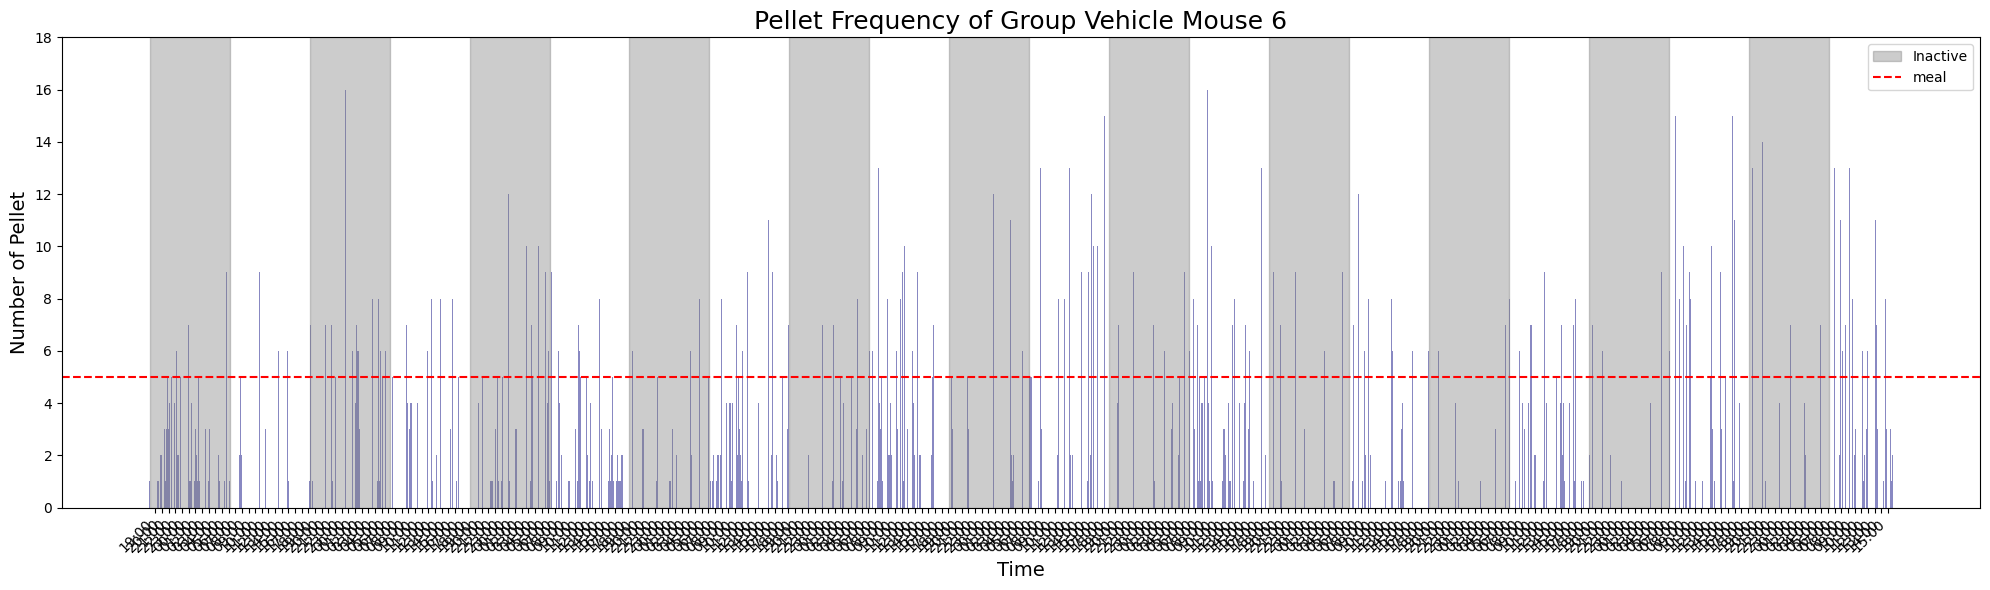

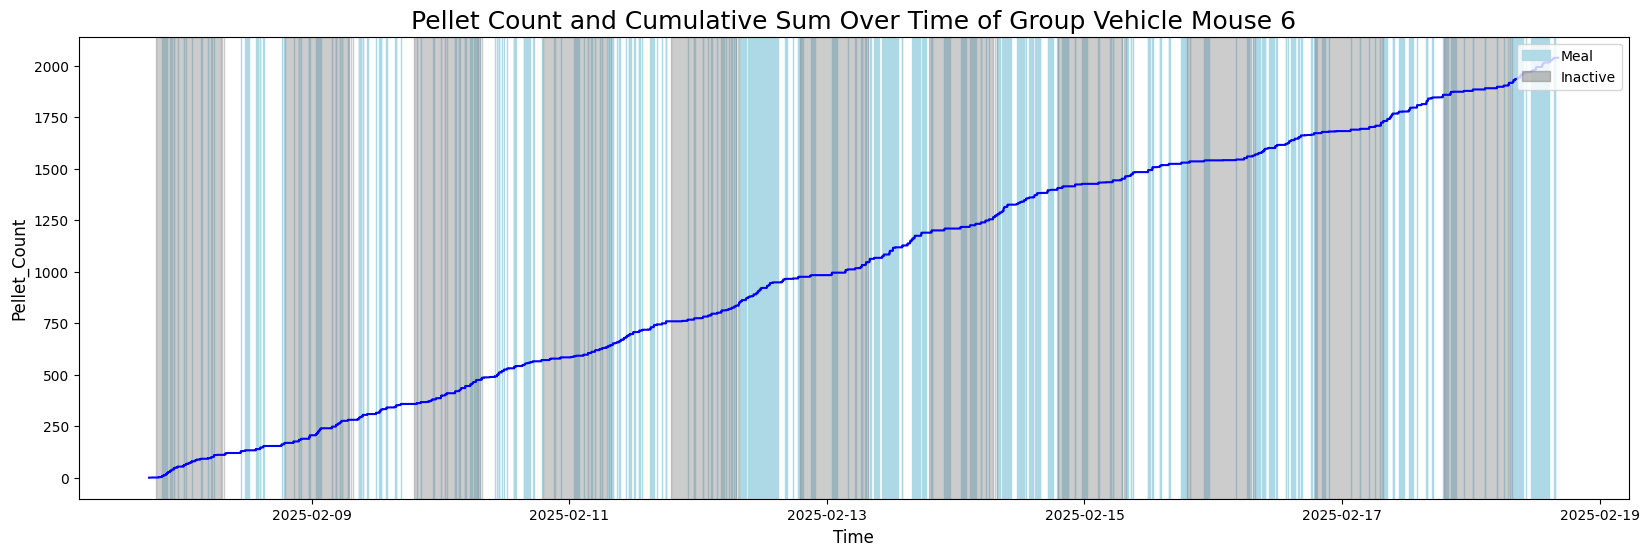

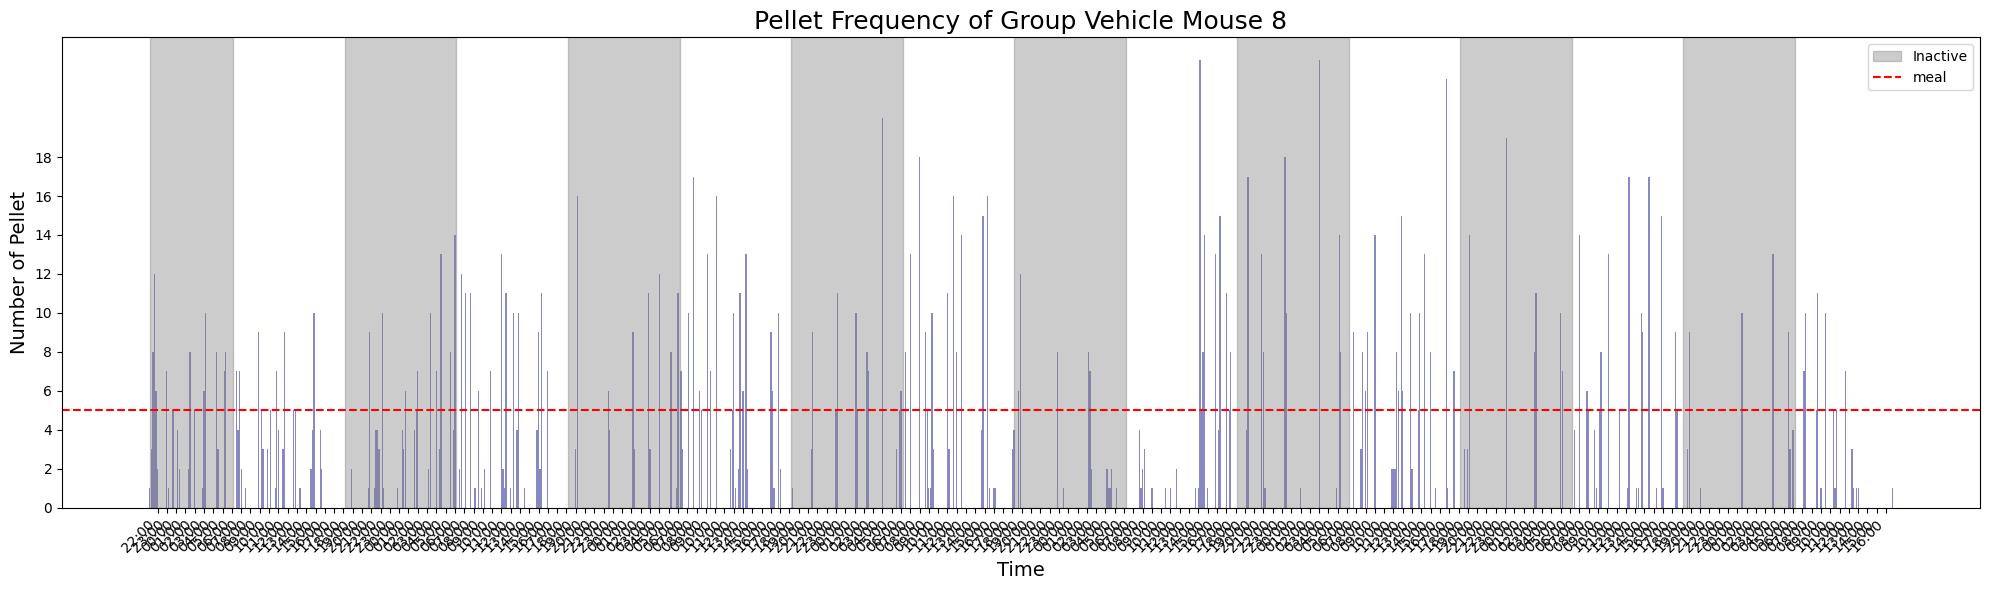

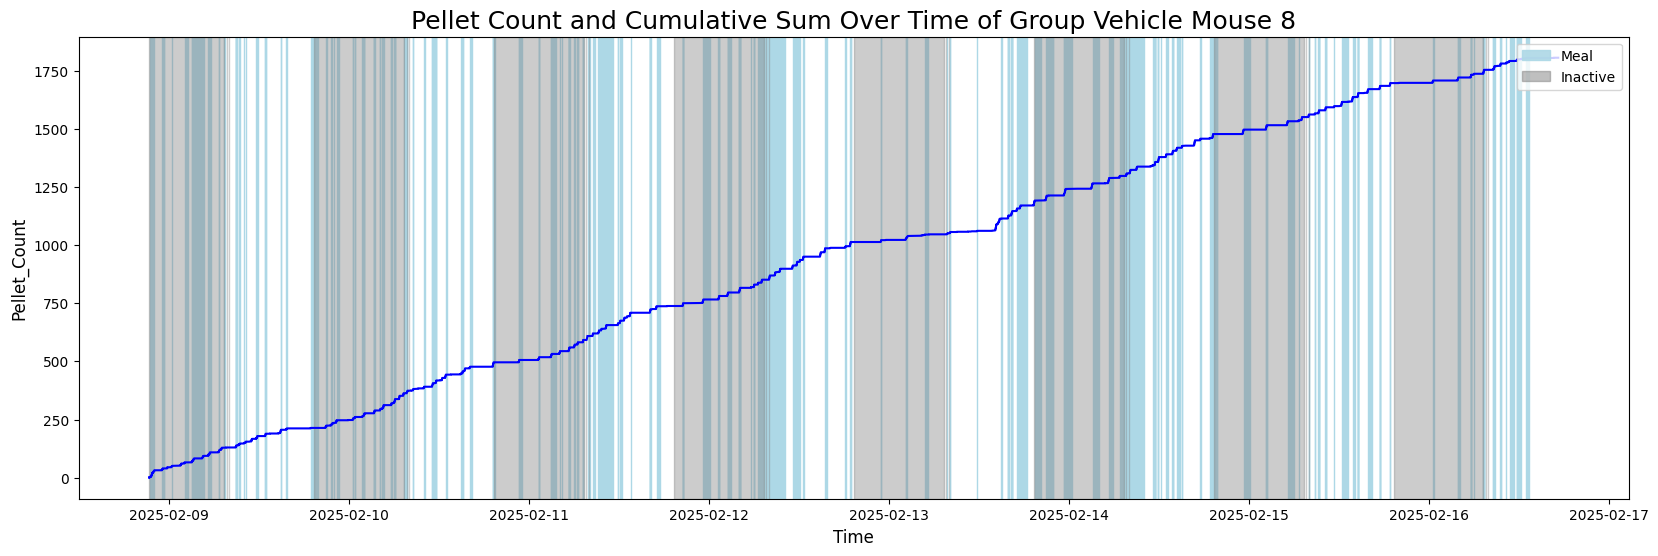

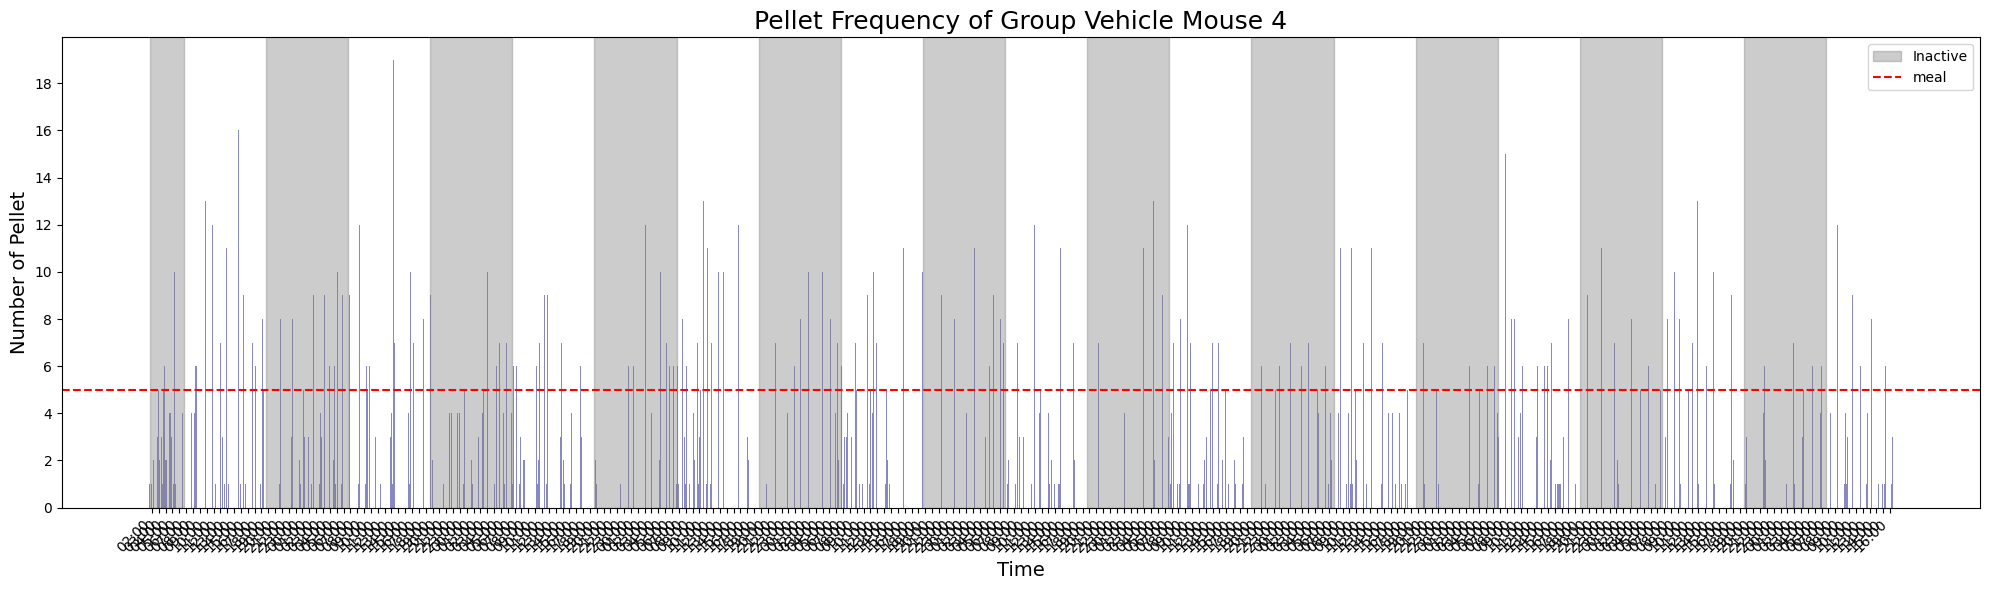

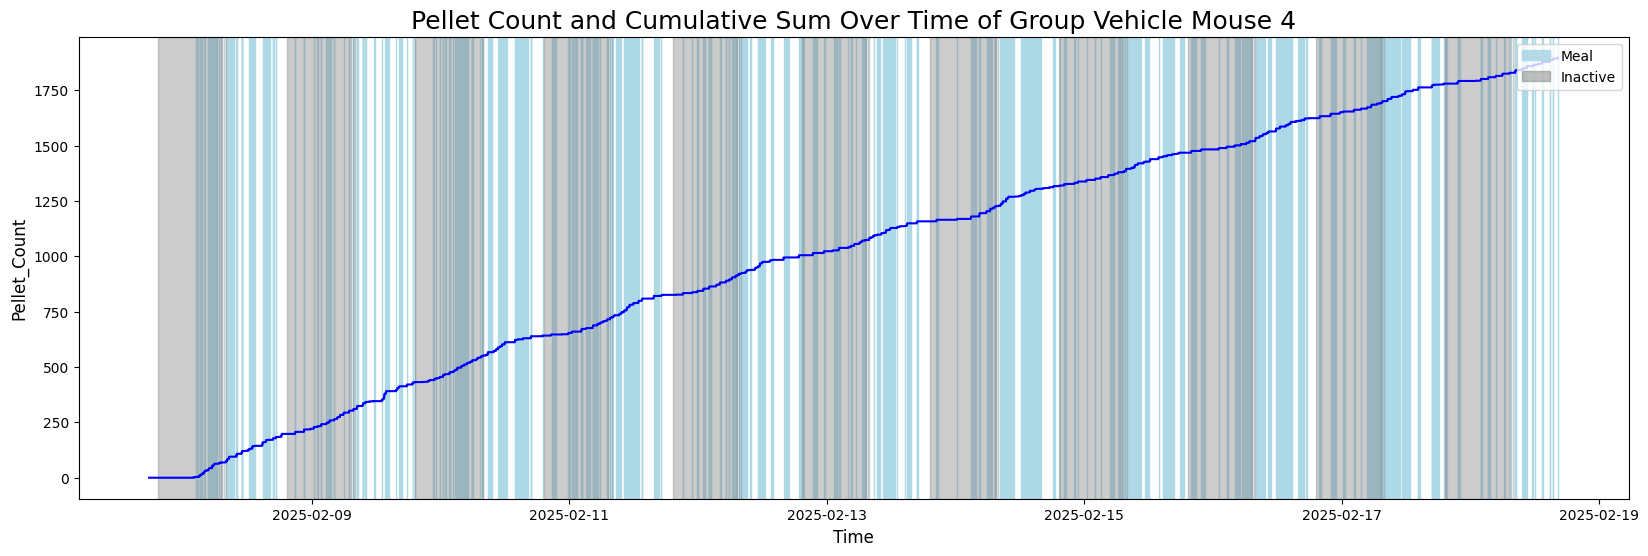

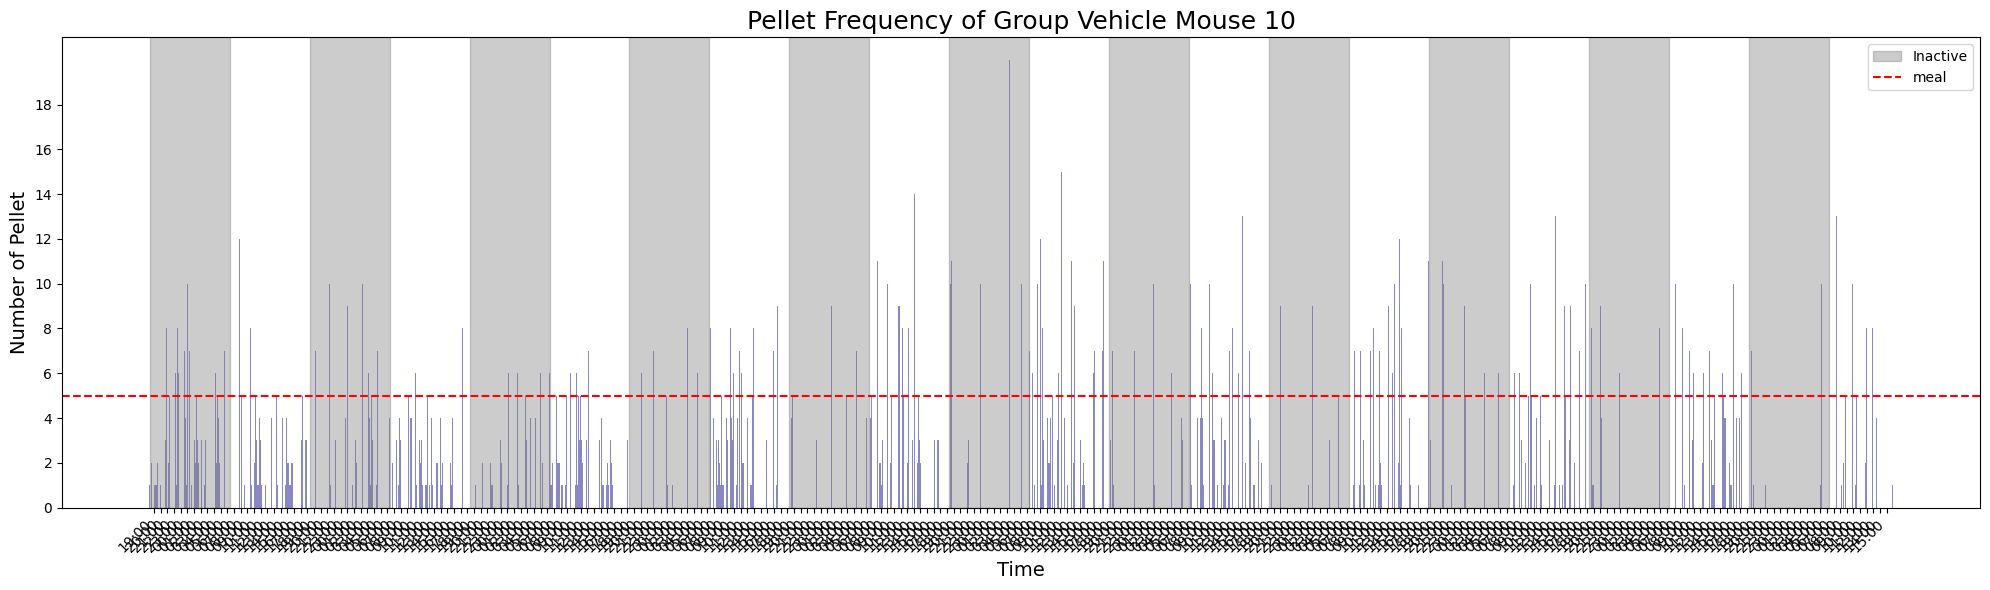

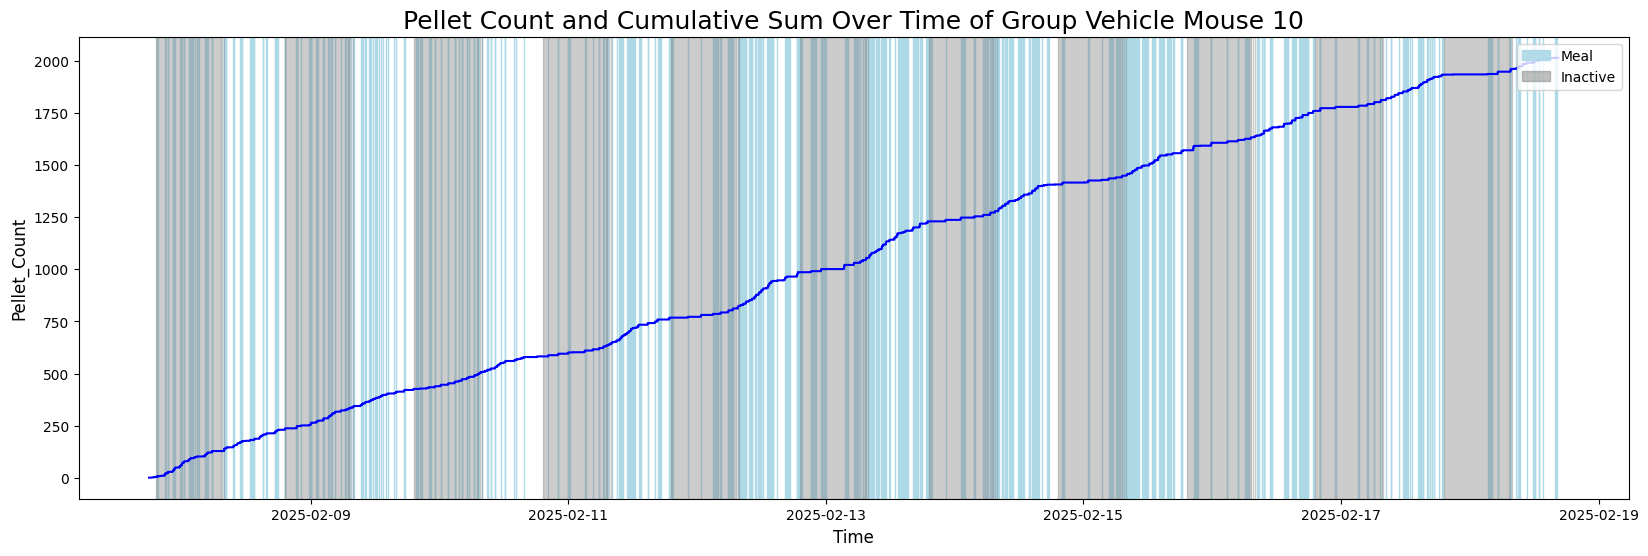

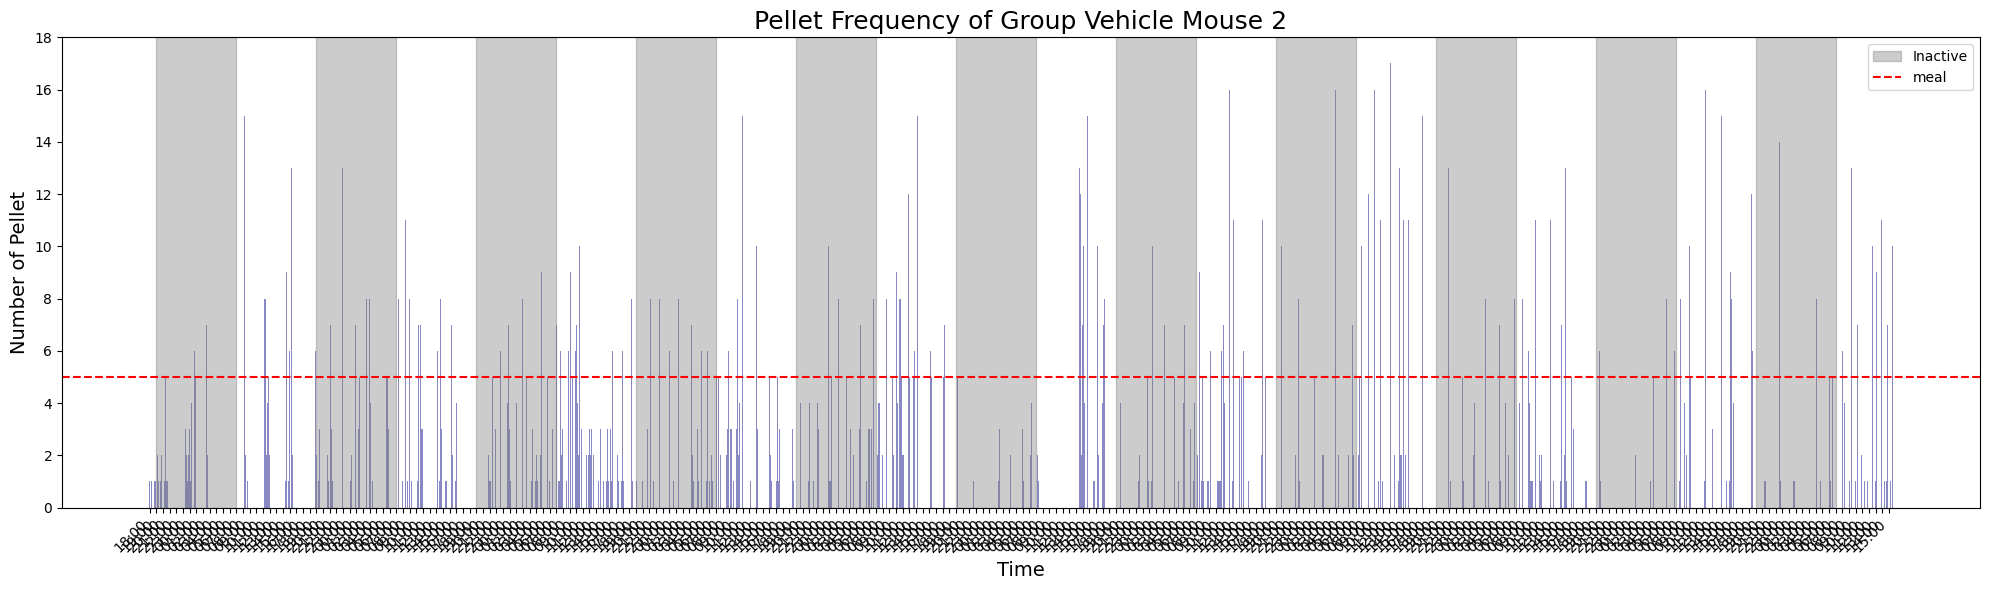

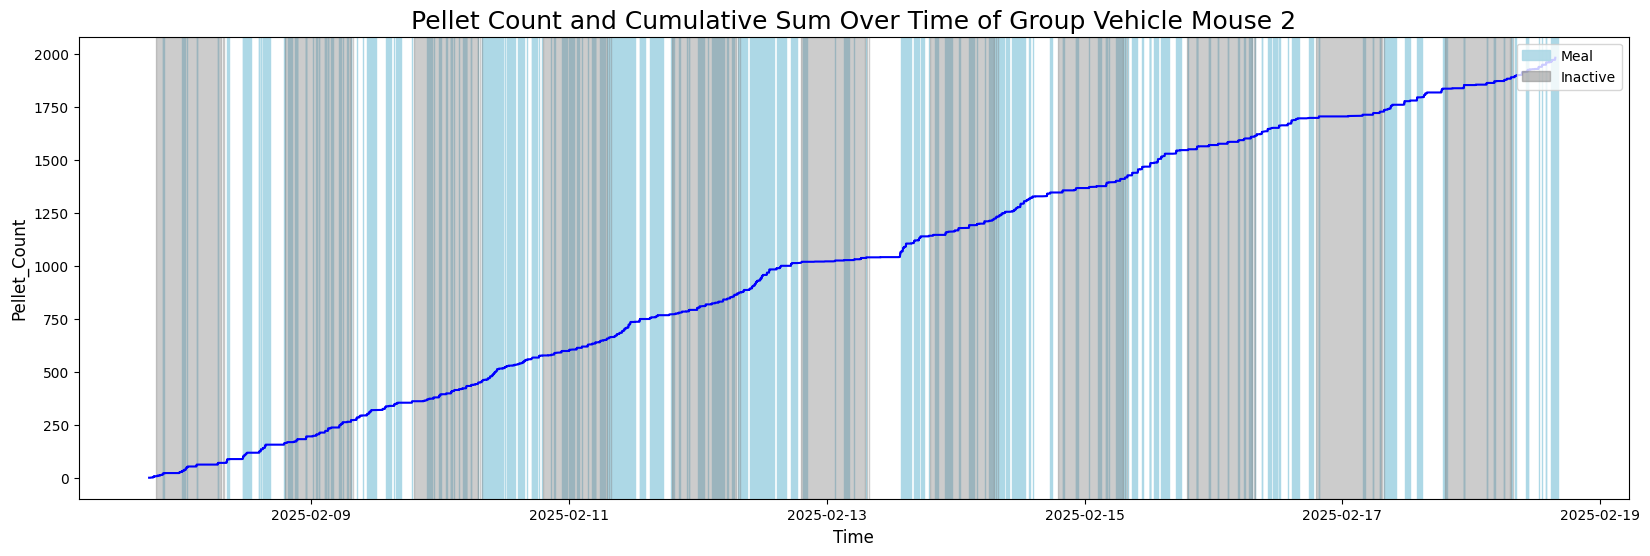

In [2]:
veh_pellet = [] # pellet per hour
veh_fir_meal = []
veh_fir_good_meal = []
flip_veh_meal_count = []

for file in os.listdir('../Food Intake Data/'):
    # print(file)
    if 'fen' in file: continue
    try:
        data = preprocess_csv(os.path.join('../Food Intake Data/', file))
    except Exception as e:
        print(f'Error when reading {file}: {e}')        
        continue
    veh_pellet.append(ml.get_daily_pellet_counts(data))
    meal,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    group = ml.pellet_flip(data)
    bhv, num = 'Vehicle', file.split('_')[0][1:]
    flip_veh_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    veh_fir_meal.append(meal_1)
    veh_fir_good_meal.append(meal_1_good)
    ml.graph_pellet_frequency(group, bhv, num, export_path=os.path.join(export_root, f'veh_pellet_freq_{bhv}_{num}.png'))
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, export_path=os.path.join(export_root, f'veh_pellet_curve_{bhv}_{num}.png'))

## Fentenyl Group

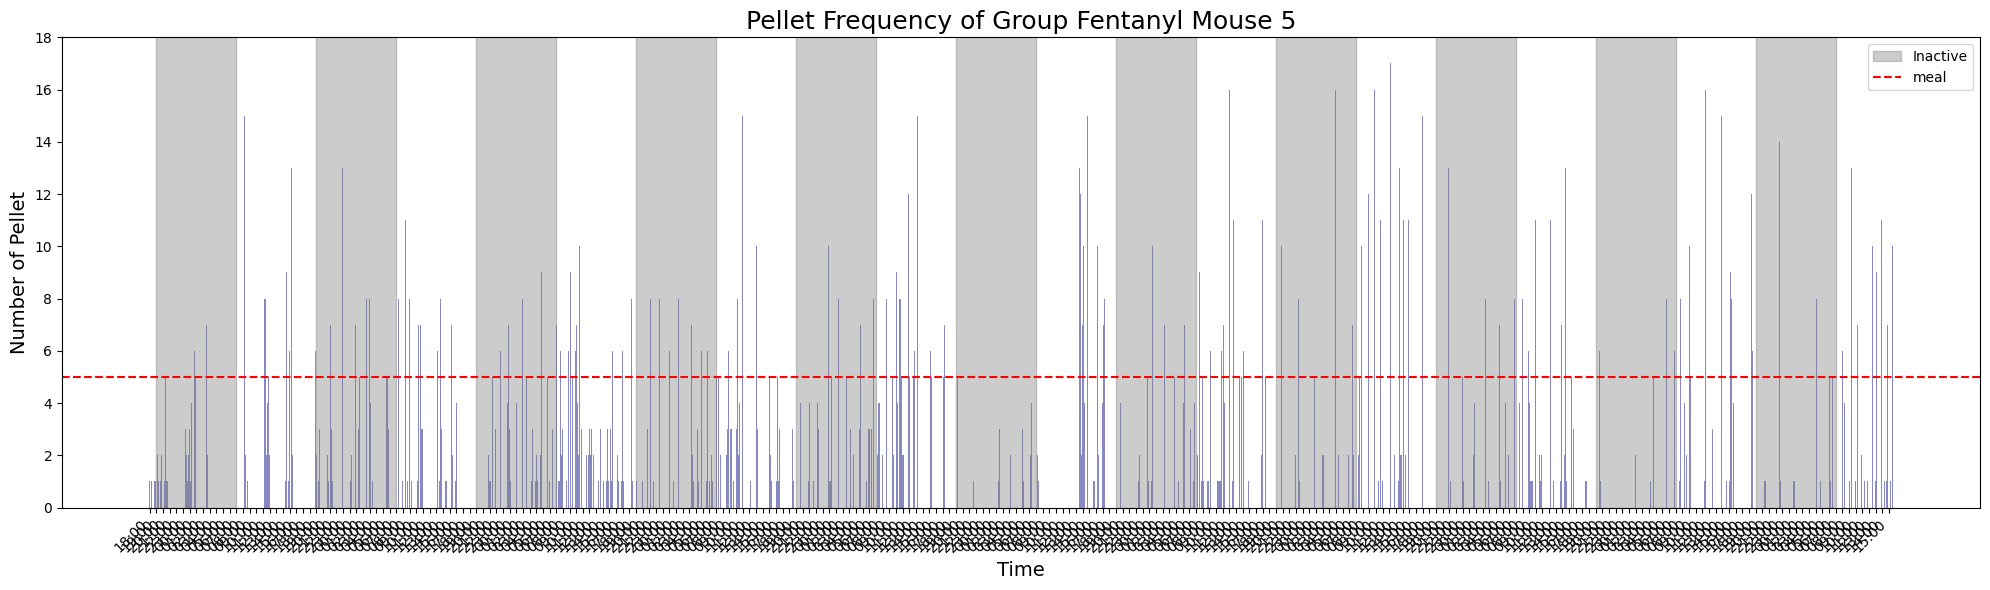

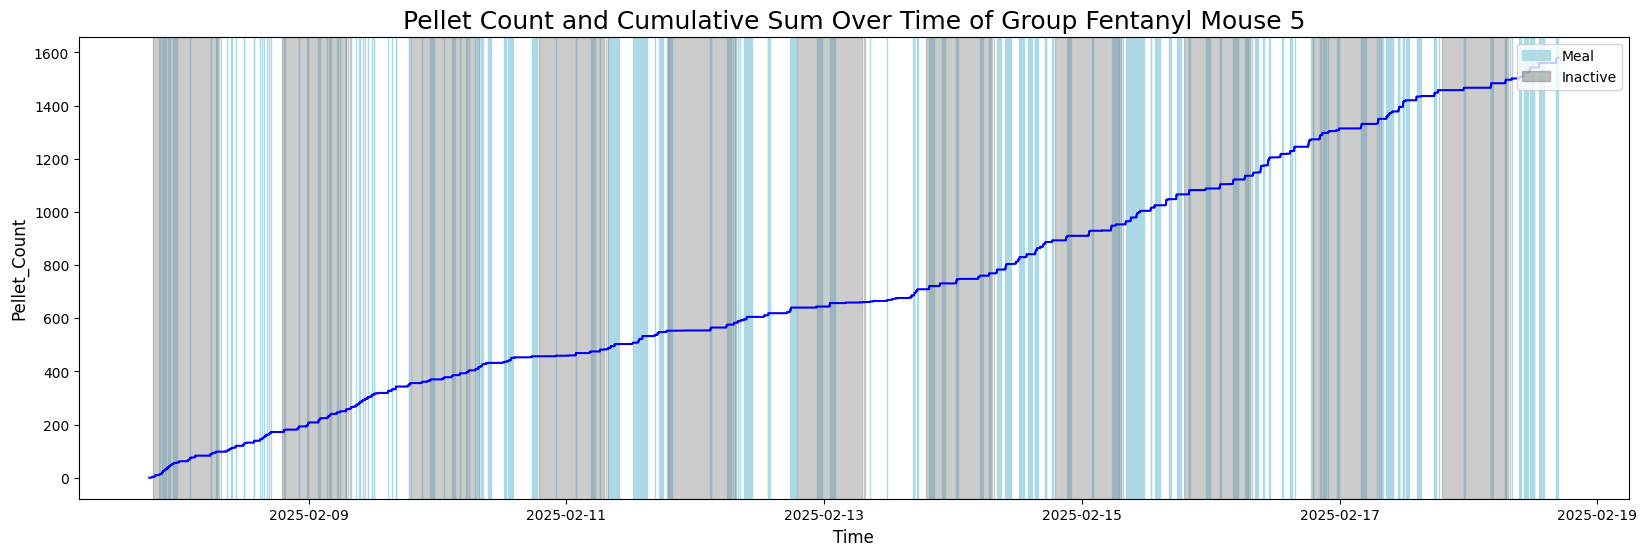

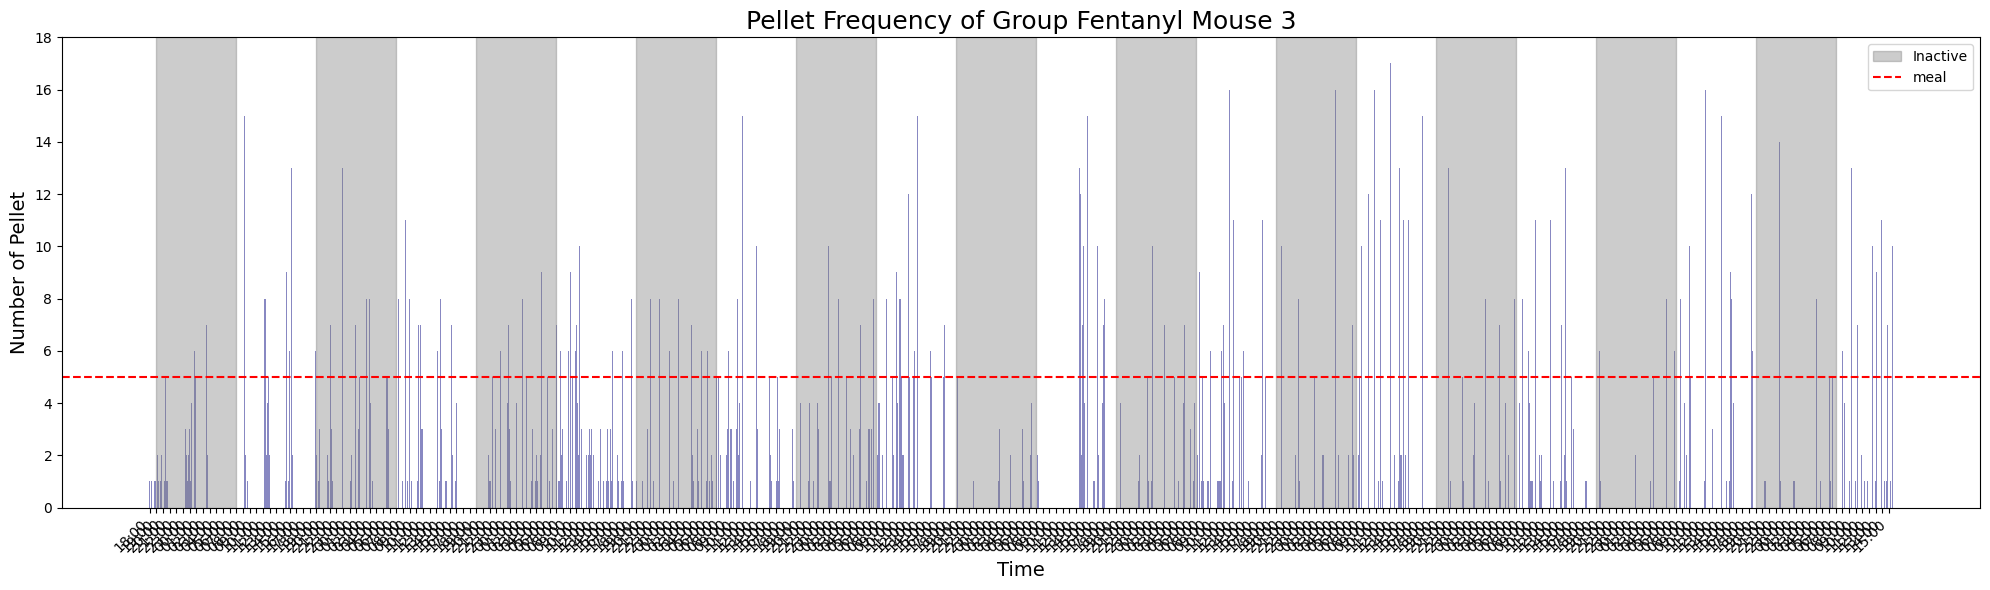

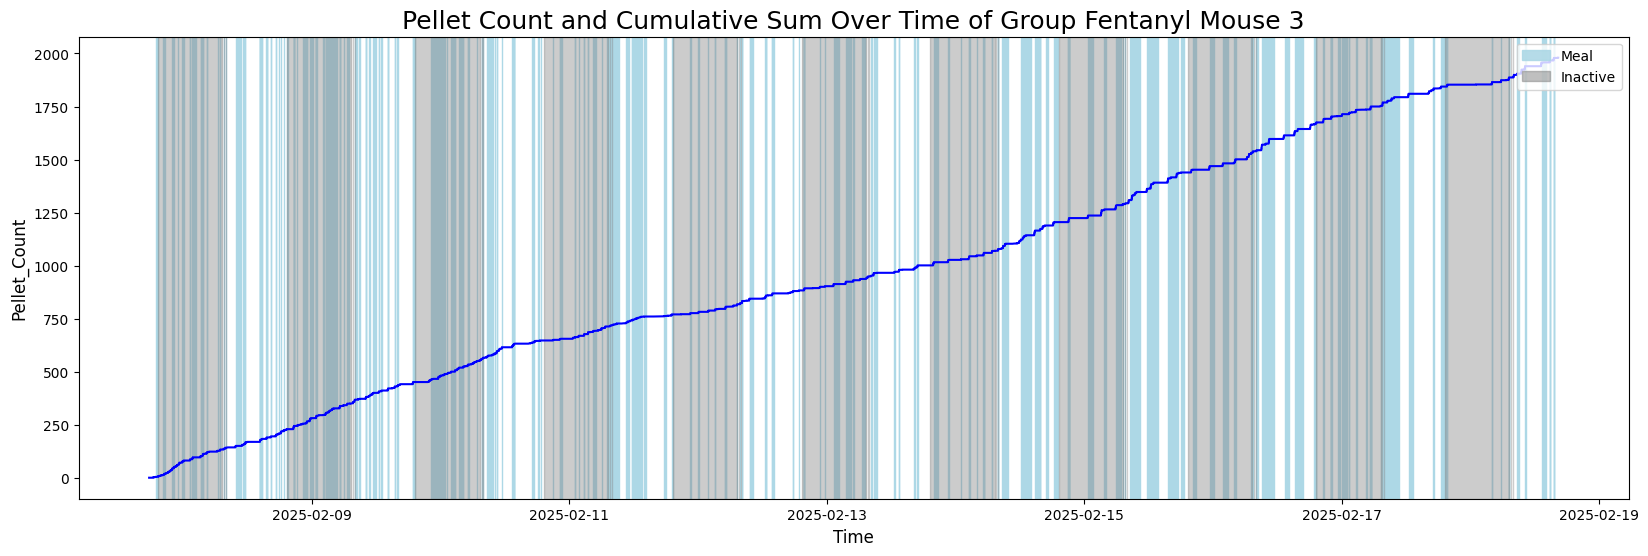

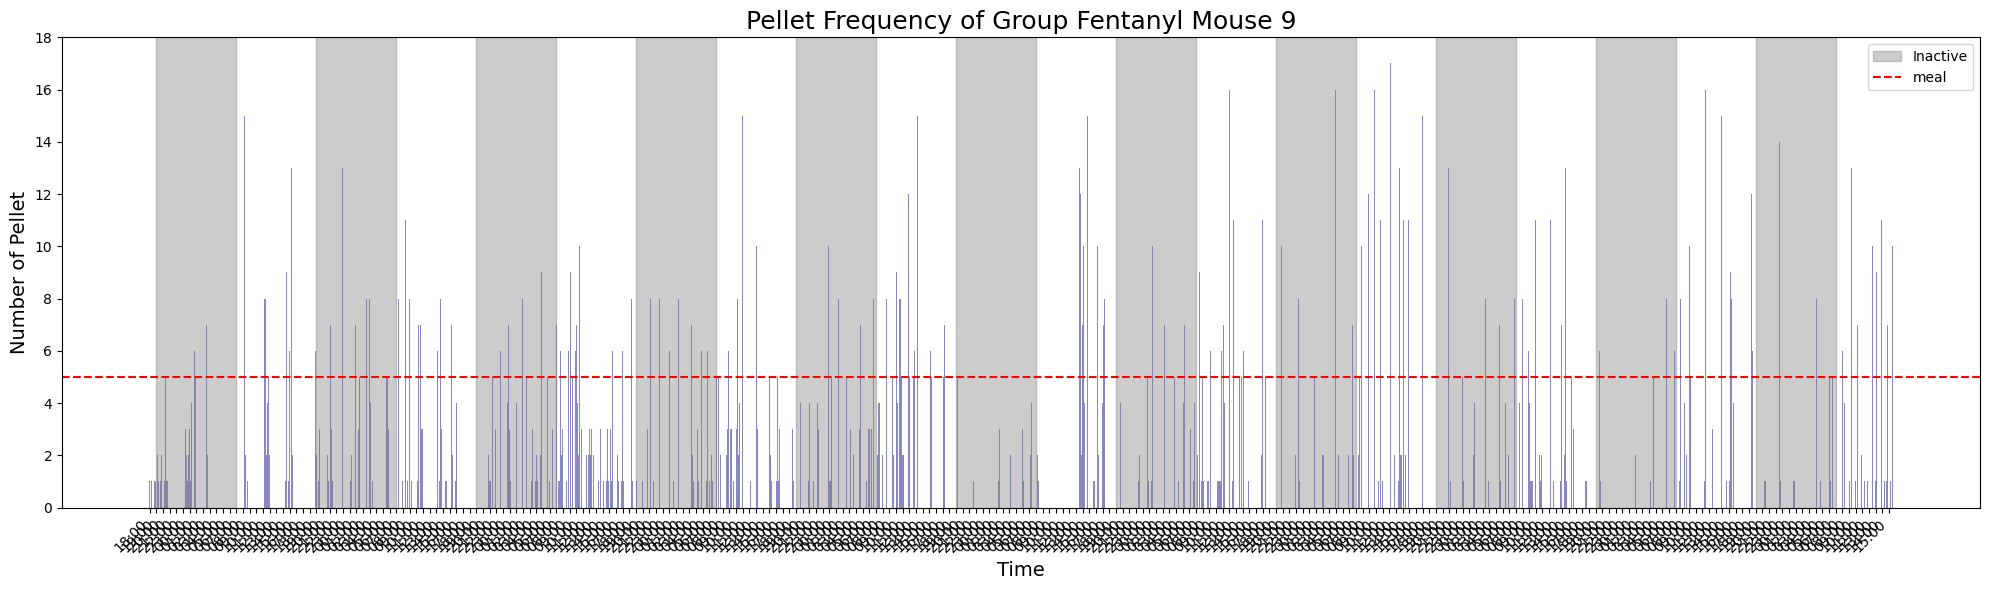

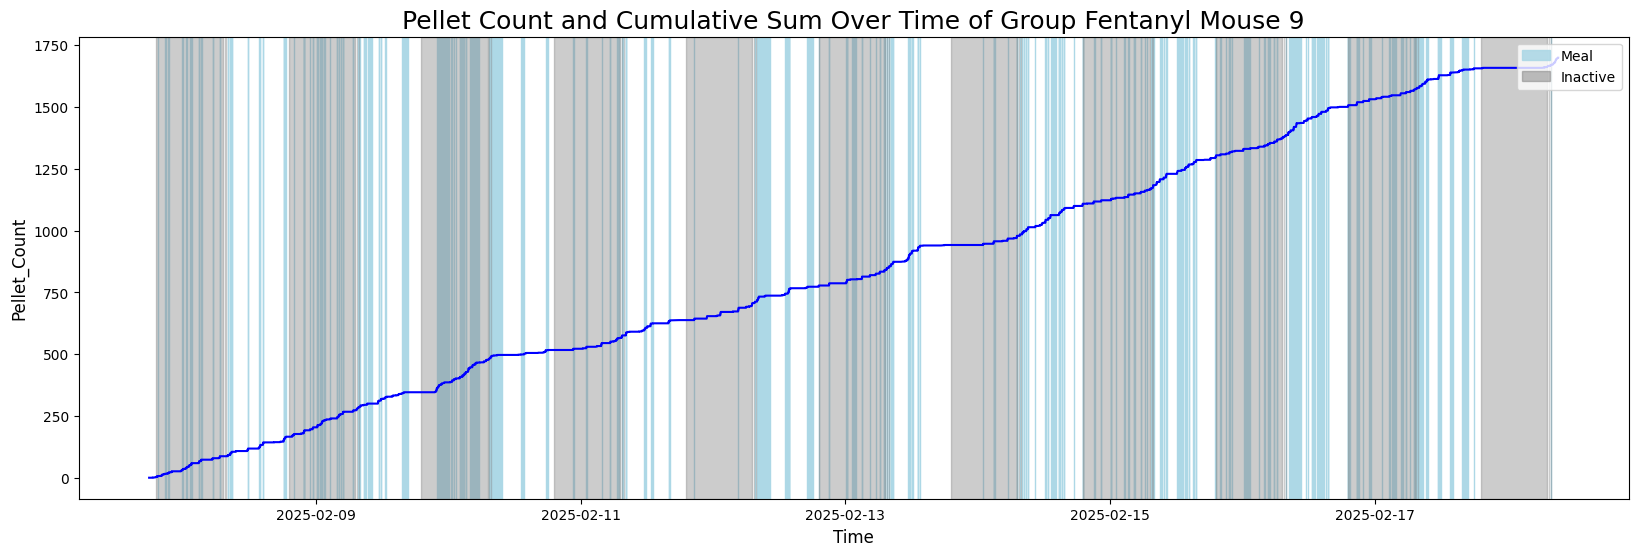

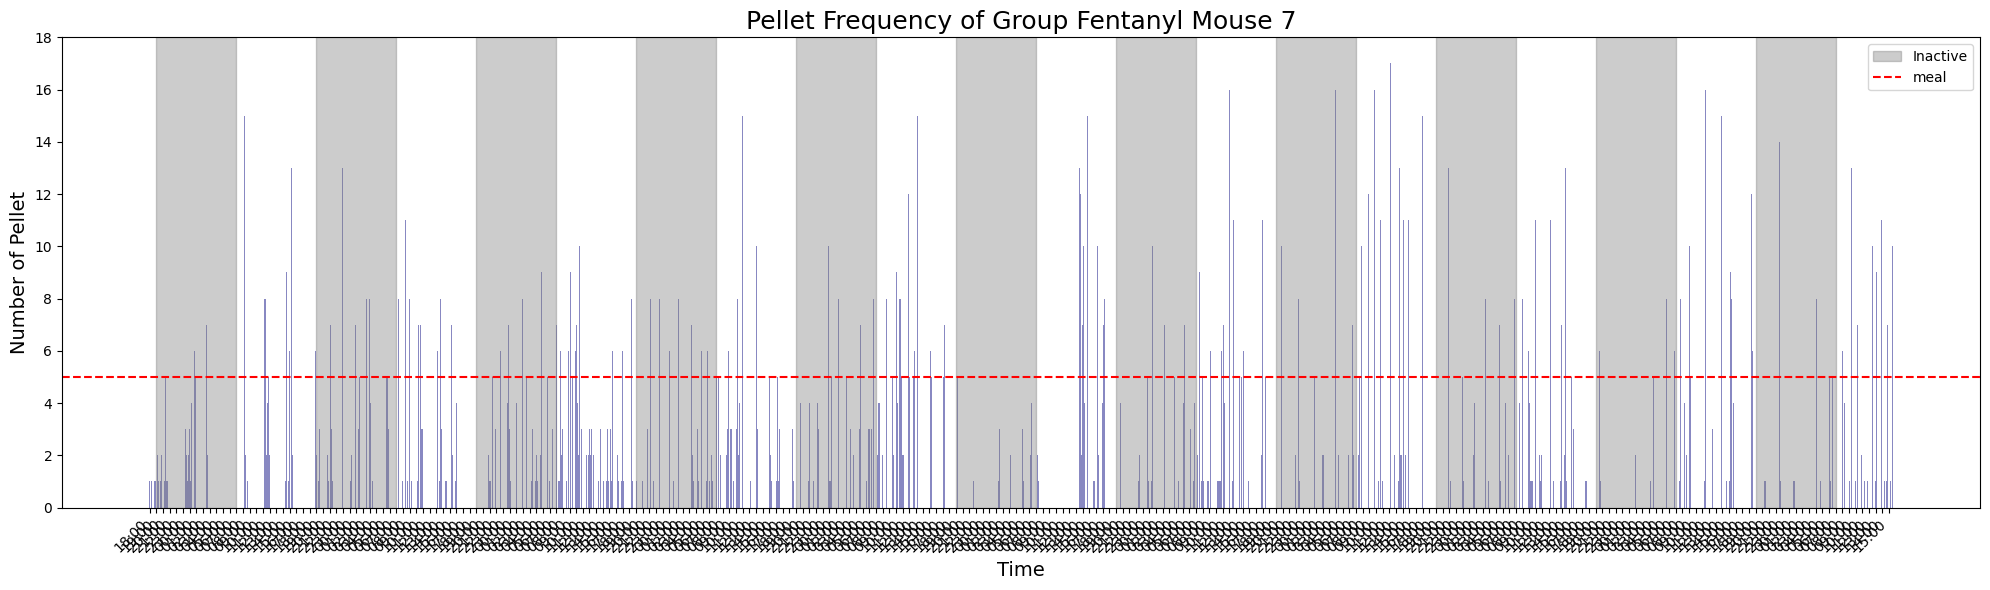

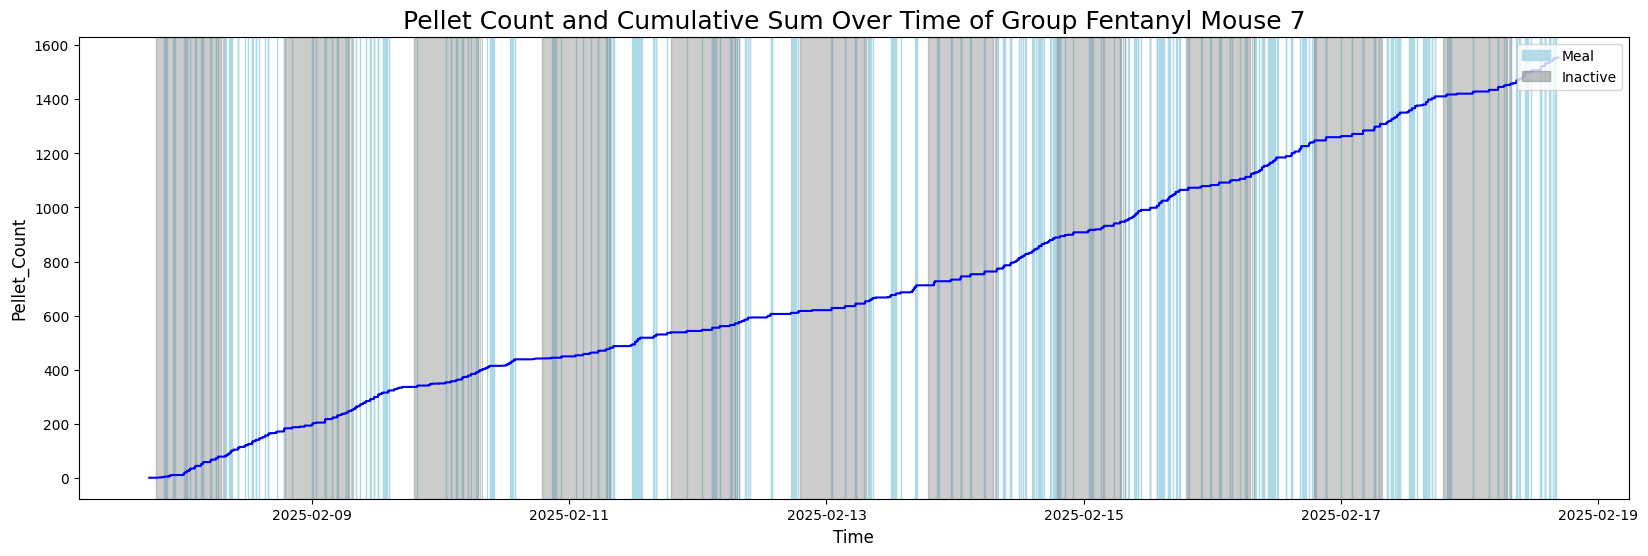

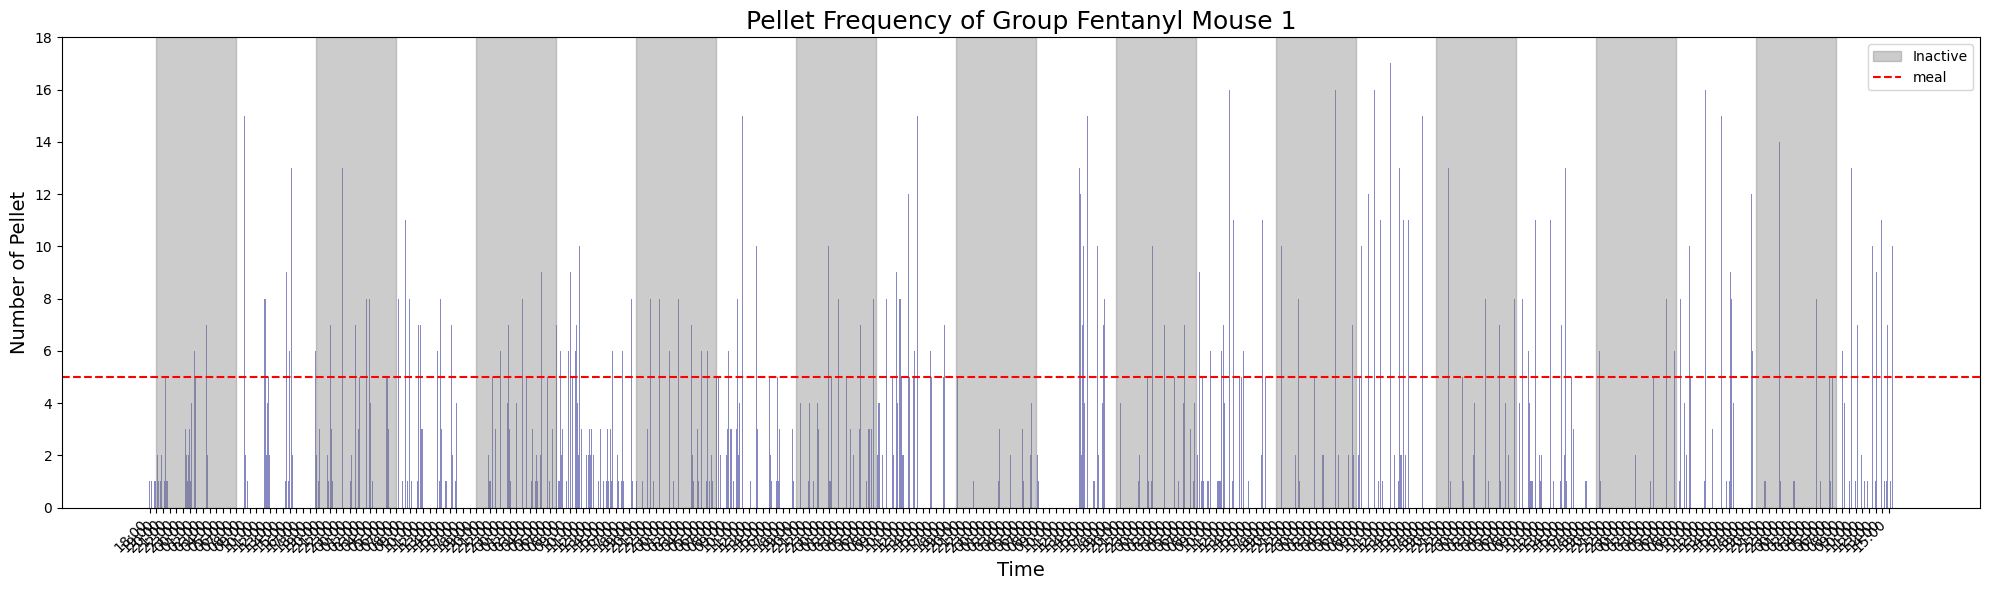

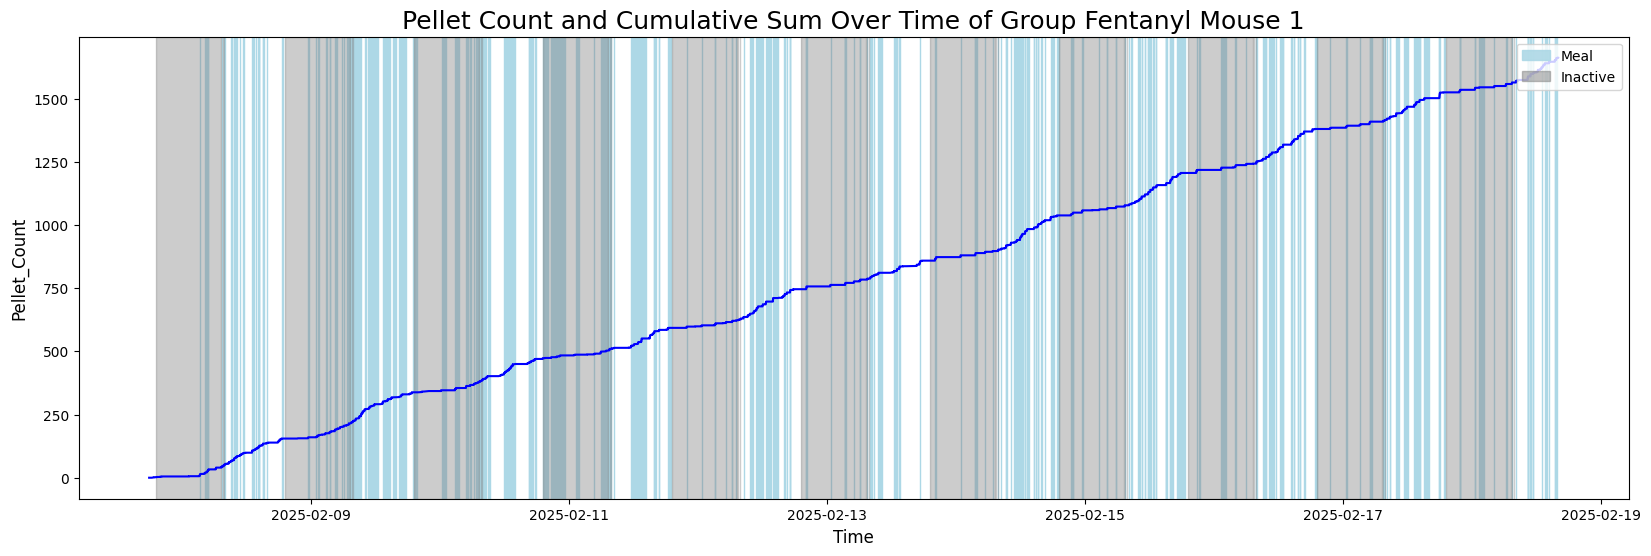

In [3]:
fent_pellet = [] # pellet per hour
fent_dark_meals = [] # percentage of meals in inactive/dark phase
fent_fir_meal = []
fent_fir_good_meal = []
flip_fent_meal_count = []

for file in os.listdir('../Food Intake Data/'):
    # print(file)
    if 'fen' not in file: continue
    try:
        data = preprocess_csv(os.path.join('../Food Intake Data/', file))
    except Exception as e:
        print(f'Error when reading {file}: {e}')        
        continue
    if len(data) < 100: continue
    fent_pellet.append(ml.get_daily_pellet_counts(data))
    bhv, num = 'Fentanyl', file.split('_')[0][1:]
    meal,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    fent_fir_meal.append(meal_1)
    fent_fir_good_meal.append(meal_1_good)
    flip_fent_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    fent_dark_meals.append(ml.active_meal(meal))

    ml.graph_pellet_frequency(group, bhv, num, export_path=os.path.join(export_root, f'fent_pellet_freq_{bhv}_{num}.png'))
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, export_path=os.path.join(export_root, f'fent_pellet_curve_{bhv}_{num}.png'))

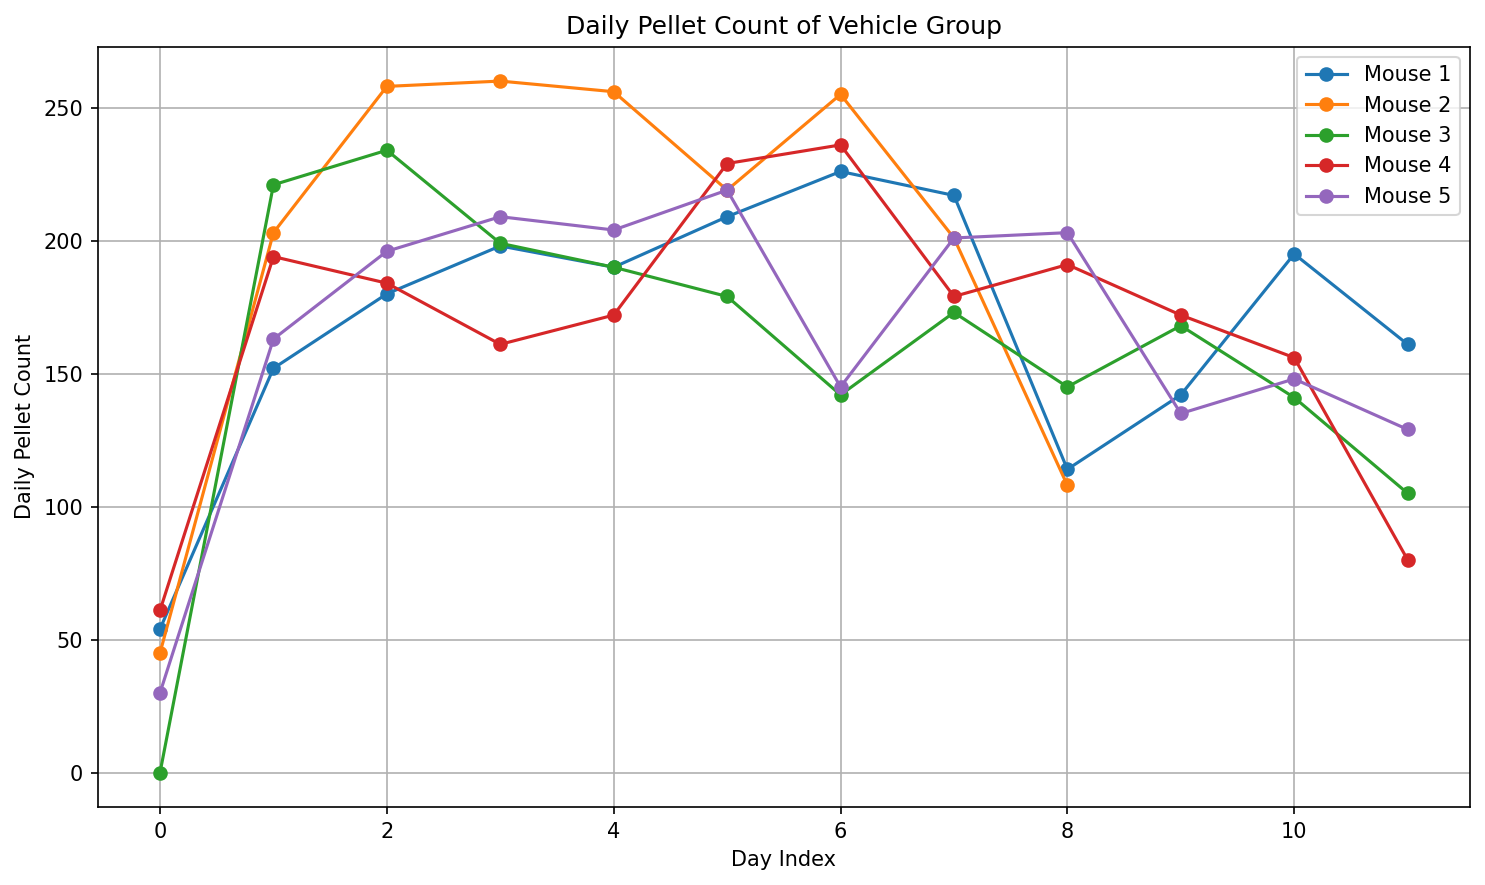

In [4]:
ml.plot_daily_pellet_counts(veh_pellet, 'Vehicle', export_path=os.path.join(export_root, '../vehicle_daily_pellet.jpg'))

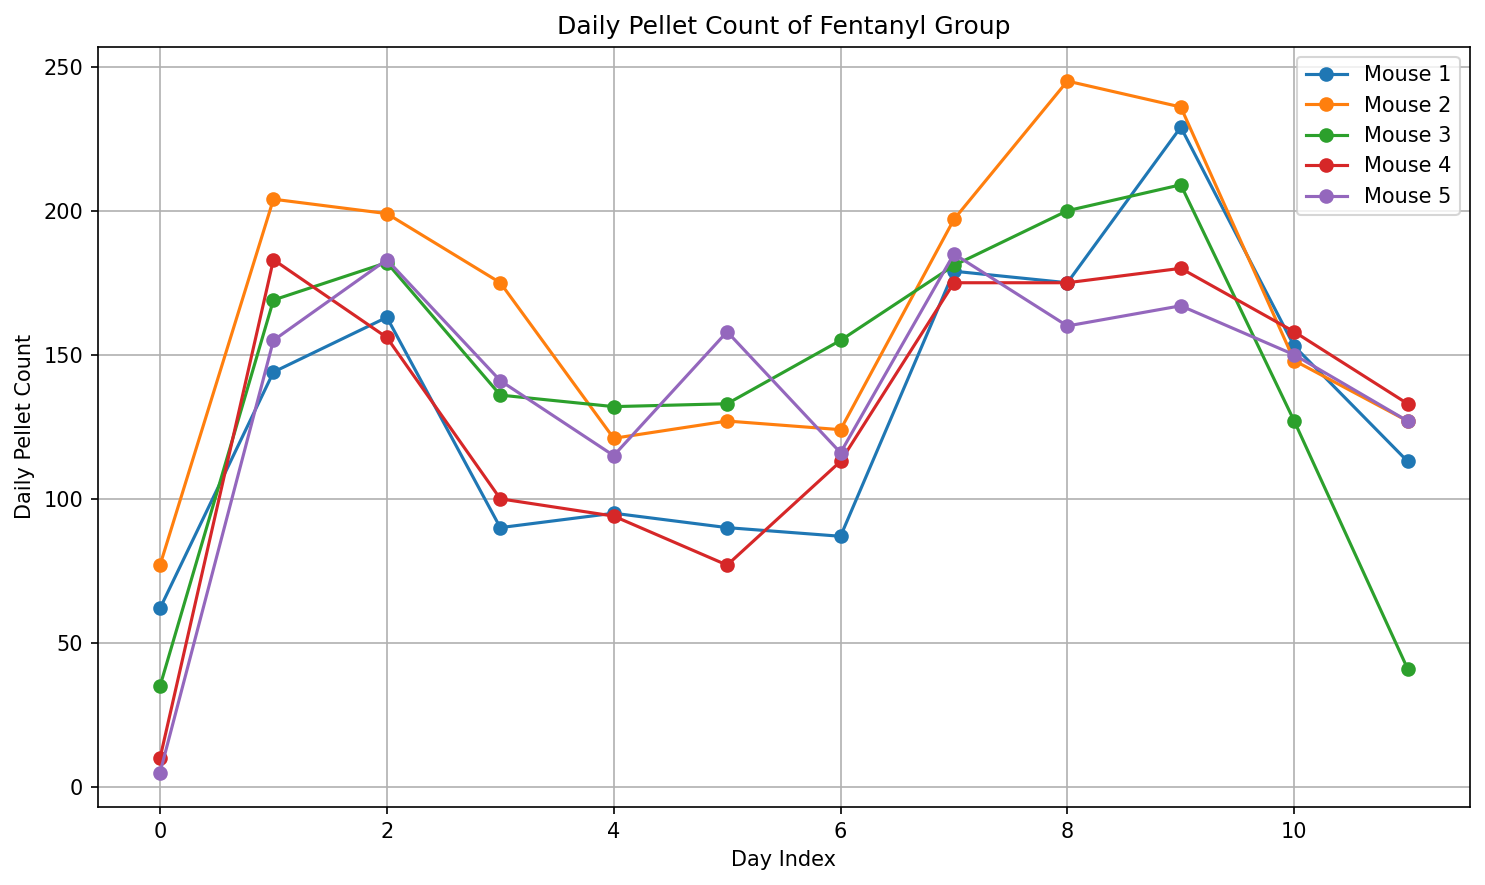

In [5]:
ml.plot_daily_pellet_counts(fent_pellet, 'Fentanyl', export_path=os.path.join(export_root, '../fentanyl_daily_pellet.jpg'))

#### Average Meal Count per Day

In [6]:
invs.perform_T_test(flip_veh_meal_count, flip_fent_meal_count, test_side='two-sided')

P Value is  0.12450476856075232
There is no significant difference between the two groups.


In [10]:
from accuracy import graph_cumulative_acc, rr_csv
from intervals import perform_T_test
from path import fr1_female_path, fr1_female_sheets

# R2M7 has false time signatures
fent_ending_corr = []
fent_learned_time = []
veh_ending_corr = []
veh_learned_time = []

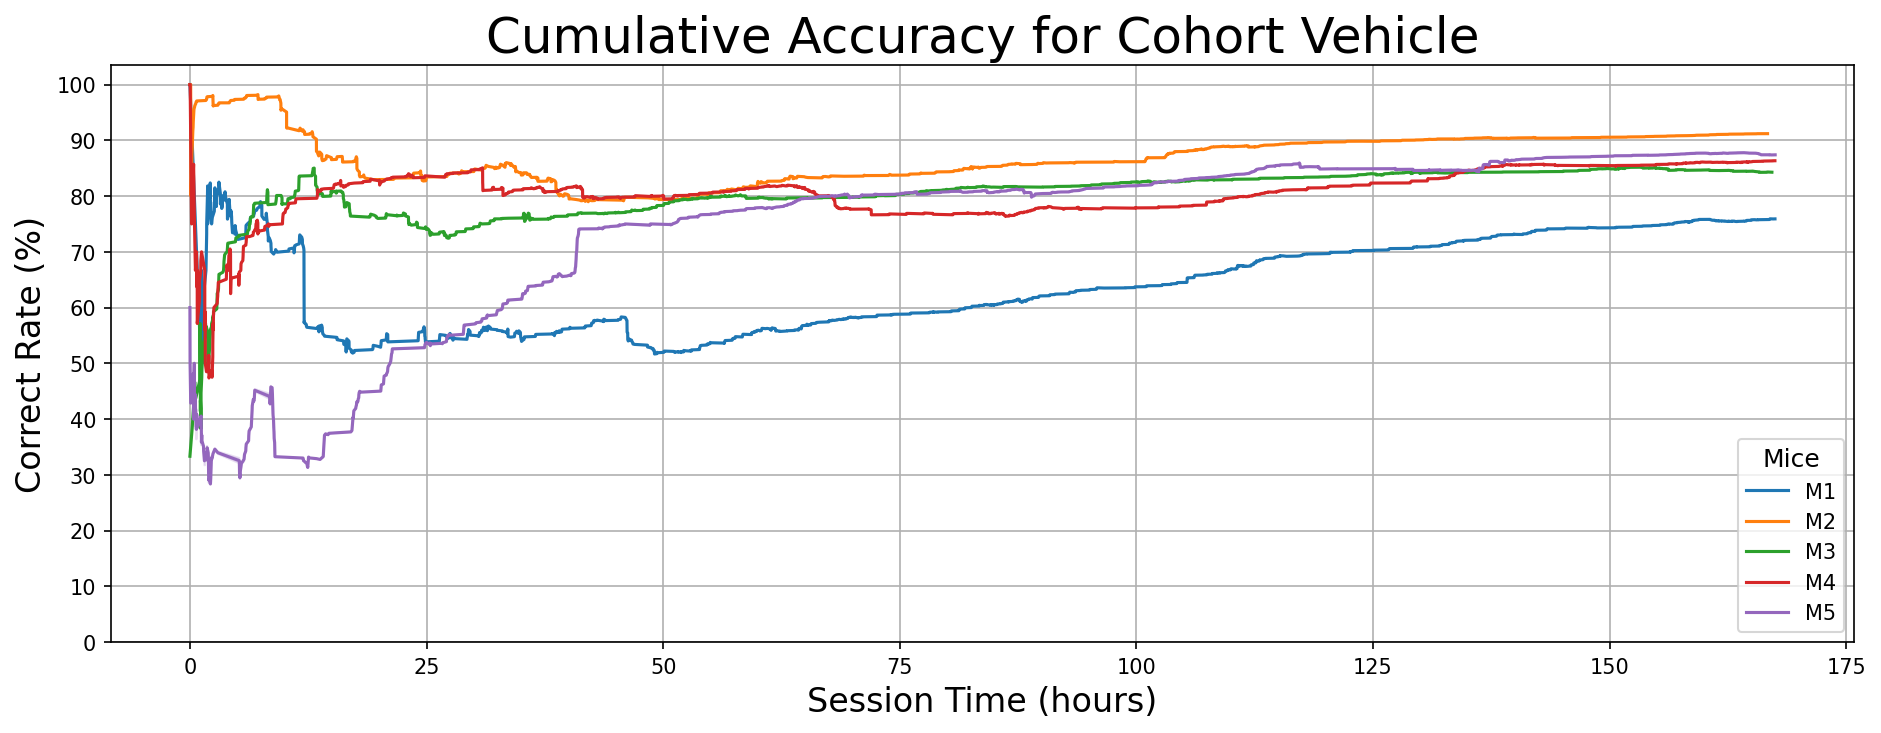

In [11]:
group_data = []

for file in os.listdir('../Food Intake Data/'):
    # print(file)
    if 'fen' in file: continue
    try:
        data = rr_csv(csv_path=os.path.join('../Food Intake Data/', file),
                            ending_corr=fent_ending_corr, 
                            learned_time=fent_learned_time)
        group_data.append(data)
    except ValueError:
        continue
graph_cumulative_acc(group_data, 'Vehicle', export_path=os.path.join(export_root, '../vehicle_accuracy_7days.jpg'))

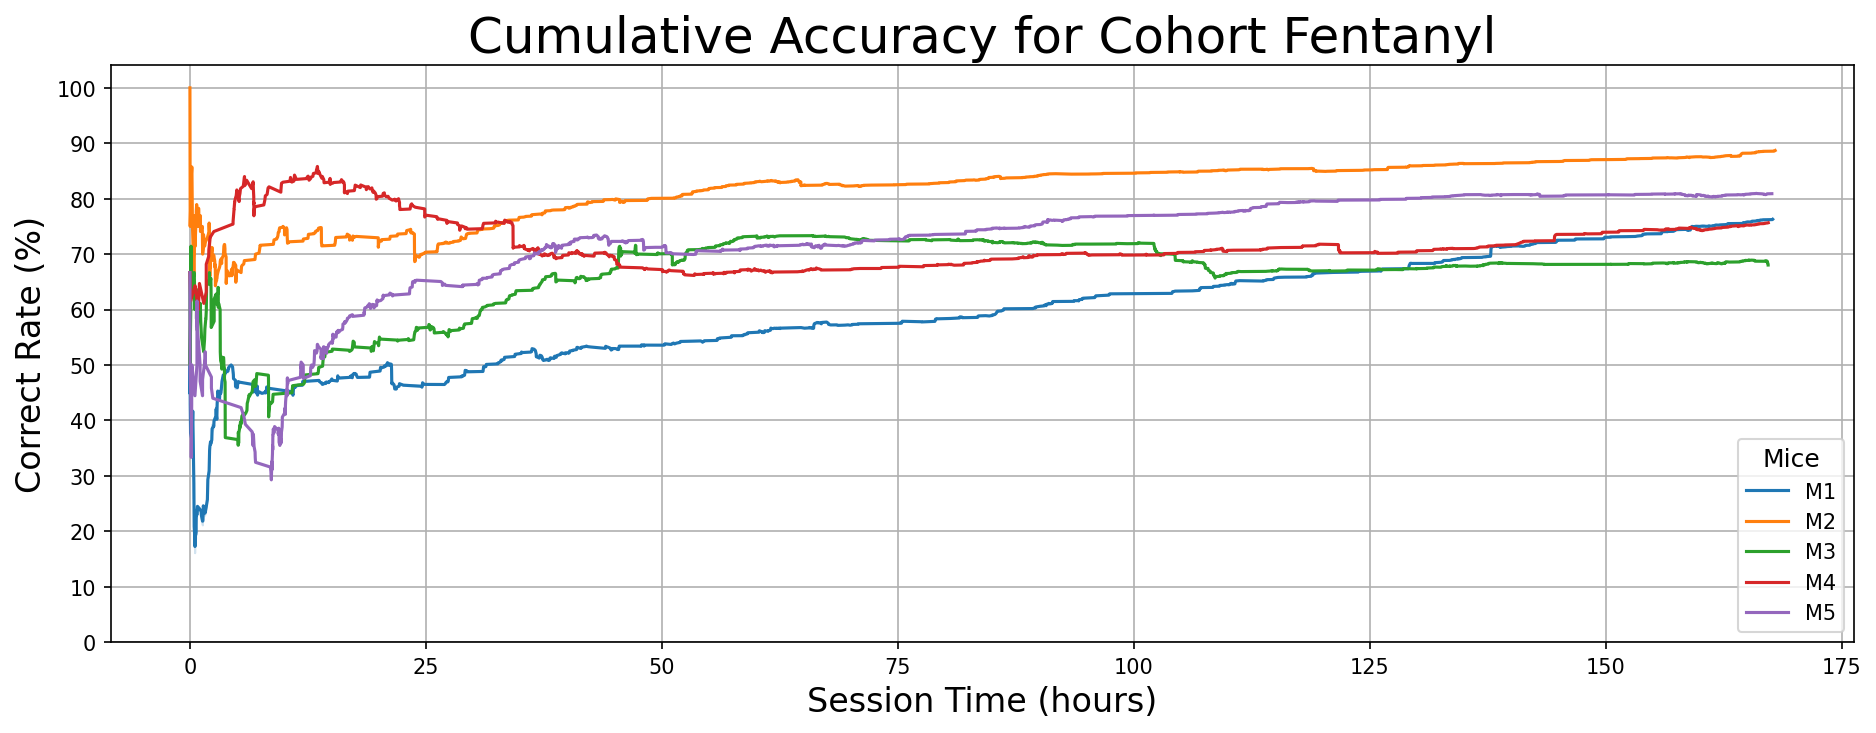

In [12]:
group_data = []

for file in os.listdir('../Food Intake Data/'):
    # print(file)
    if 'sal' in file: continue
    try:
        data = rr_csv(csv_path=os.path.join('../Food Intake Data/', file),
                            ending_corr=veh_ending_corr, 
                            learned_time=veh_learned_time)
        group_data.append(data)
    except ValueError:
        continue
graph_cumulative_acc(group_data, 'Fentanyl', export_path=os.path.join(export_root, '../fentanyl_accuracy_7days.jpg'))

In [13]:
from intervals import perform_T_test

perform_T_test(fent_ending_corr, veh_ending_corr)

P Value is  0.13292140944381145
There is no significant difference between the two groups.
